<a href="https://colab.research.google.com/github/megmarv/Client-Deposit-Prediction/blob/main/ModelsForMLcw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import clone
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import time
from google.colab import drive
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

## Load preprocessed datasets

In [19]:
X_train = pd.read_csv('/content/drive/MyDrive/ML/X_balanced.csv').values
y_train = pd.read_csv('/content/drive/MyDrive/ML/y_balanced.csv')['y'].values
X_test = pd.read_csv('/content/drive/MyDrive/ML/X_test_preprocessed.csv').values
y_test = pd.read_csv('/content/drive/MyDrive/ML/y_test_preprocessed.csv')['y'].values

## Model 1 : Custom FeedForward Neural Network

In [20]:
# Define the Feedforward Neural Network model with an additional hidden layer
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input + 1st hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(32, activation='relu'),  # 3rd hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           6,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,385 (64.00 KB)

 Trainable params: 16,385 (64.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

nn_start_time = time.time()

history = model.fit(
    X_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
    ]
)

nn_end_time = time.time()
nn_training_time = nn_end_time - nn_start_time

# Evaluate the model on the test set
y_pred_nn = model.predict(X_test)
y_pred = (y_pred_nn > 0.5).astype(int)

print("\nAccuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Epoch 1/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7575 - loss: 0.5361 - val_accuracy: 0.6087 - val_loss: 0.6952 - learning_rate: 0.0010
Epoch 2/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7824 - loss: 0.5005 - val_accuracy: 0.6128 - val_loss: 0.6398 - learning_rate: 0.0010
Epoch 3/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7901 - loss: 0.4781 - val_accuracy: 0.6198 - val_loss: 0.6892 - learning_rate: 0.0010
Epoch 4/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7929 - loss: 0.4650 - val_accuracy: 0.6575 - val_loss: 0.5975 - learning_rate: 0.0010
Epoch 5/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7948 - loss: 0.4584 - val_accuracy: 0.6801 - val_loss: 0.5537 - learning_rate: 0.0010
Epoch 6/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8041 - loss: 0.4429 - val_accuracy: 0.6744 - val_loss: 0.5524 - learning_rate: 0.0010
Epoch 7/40
1827/1827 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8009 - l

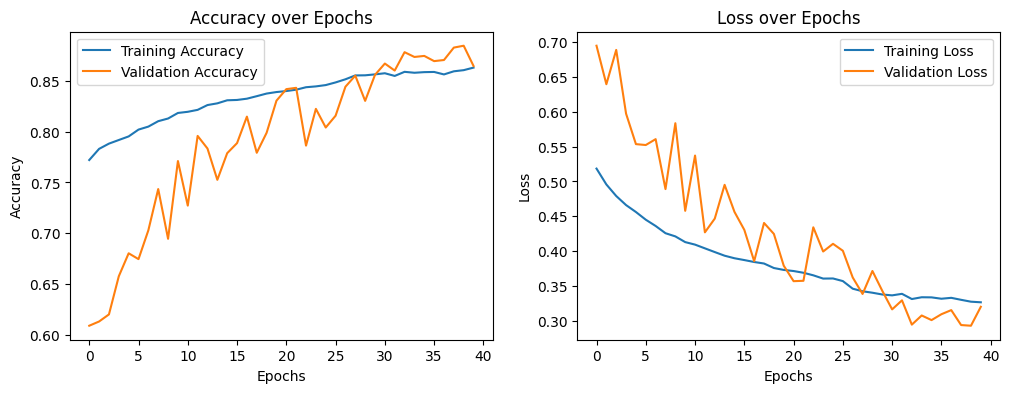

In [23]:
# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [9]:
# Save the model
model.save('/content/drive/MyDrive/ML/fnn_model.h5')
print("FNN model saved to Google Drive.")

FNN model saved to Google Drive.


## Model 2 : Custom Random Forest Classification

In [24]:
class RandomForestClassifierCustom:
    def __init__(self, n_trees=100, max_depth=None, max_features='sqrt', random_state=None):
        """
        Custom Random Forest Classifier.

        Parameters:
        - n_trees: Number of decision trees in the forest.
        - max_depth: Maximum depth of each tree.
        - max_features: Number of features to consider when looking for the best split.
        - random_state: Seed for reproducibility.
        """
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.feature_subsets = []
        self.bootstraps = []

    def _bootstrap(self, X, y):
        """Create a bootstrap sample from the dataset."""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def fit(self, X, y):
        """Fit the random forest to the training data."""
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_subsets = []

        for _ in range(self.n_trees):
            # Bootstrap sampling
            X_bootstrap, y_bootstrap = self._bootstrap(X, y)
            self.bootstraps.append((X_bootstrap, y_bootstrap))

            # Feature subset sampling
            n_features = X.shape[1]
            if self.max_features == 'sqrt':
                n_features_to_select = int(np.sqrt(n_features))
            elif self.max_features == 'log2':
                n_features_to_select = int(np.log2(n_features))
            else:
                n_features_to_select = n_features

            features = np.random.choice(range(n_features), n_features_to_select, replace=False)
            self.feature_subsets.append(features)

            # Train a decision tree on the bootstrap sample
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap[:, features], y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        """Predict class labels for the input data."""
        tree_predictions = []
        for tree, features in zip(self.trees, self.feature_subsets):
            predictions = tree.predict(X[:, features])
            tree_predictions.append(predictions)

        # Majority vote
        tree_predictions = np.array(tree_predictions)
        majority_votes = np.apply_along_axis(lambda x: Counter(x).most_common(1)[0][0], axis=0, arr=tree_predictions)
        return majority_votes

In [25]:
# Load the dataset
X_train = pd.read_csv('/content/drive/MyDrive/ML/X_balanced.csv').values
y_train = pd.read_csv('/content/drive/MyDrive/ML/y_balanced.csv')['y'].values
X_test = pd.read_csv('/content/drive/MyDrive/ML/X_test_preprocessed.csv').values
y_test = pd.read_csv('/content/drive/MyDrive/ML/y_test_preprocessed.csv')['y'].values

In [26]:
# Initialize and train the custom random forest
rf_start_time = time.time()
random_forest = RandomForestClassifierCustom(n_trees=150, max_depth=None, max_features='sqrt', random_state=42)
random_forest.fit(X_train, y_train)
rf_end_time = time.time()
rf_training_time = rf_end_time - rf_start_time

# Random Forest Predictions
y_pred_rf_probs = random_forest.predict(X_test)
y_pred_rf = (y_pred_rf_probs > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on Test Set: 0.9029

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      3668
           1       0.54      0.69      0.61       451

    accuracy                           0.90      4119
   macro avg       0.75      0.81      0.78      4119
weighted avg       0.91      0.90      0.91      4119



In [27]:
# Convert probabilities to binary predictions for classification_report
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)
y_pred_rf_binary = (y_pred_rf_probs > 0.5).astype(int)

# Evaluate and Compare Models
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn_binary))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_binary))

print(f"Training Time - Neural Network: {nn_training_time:.2f} seconds")
print(f"Training Time - Random Forest: {rf_training_time:.2f} seconds")

Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      3668
           1       0.54      0.69      0.61       451

    accuracy                           0.90      4119
   macro avg       0.75      0.81      0.78      4119
weighted avg       0.91      0.90      0.91      4119

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3668
           1       0.62      0.41      0.49       451

    accuracy                           0.91      4119
   macro avg       0.77      0.69      0.72      4119
weighted avg       0.90      0.91      0.90      4119

Training Time - Neural Network: 249.68 seconds
Training Time - Random Forest: 24.96 seconds


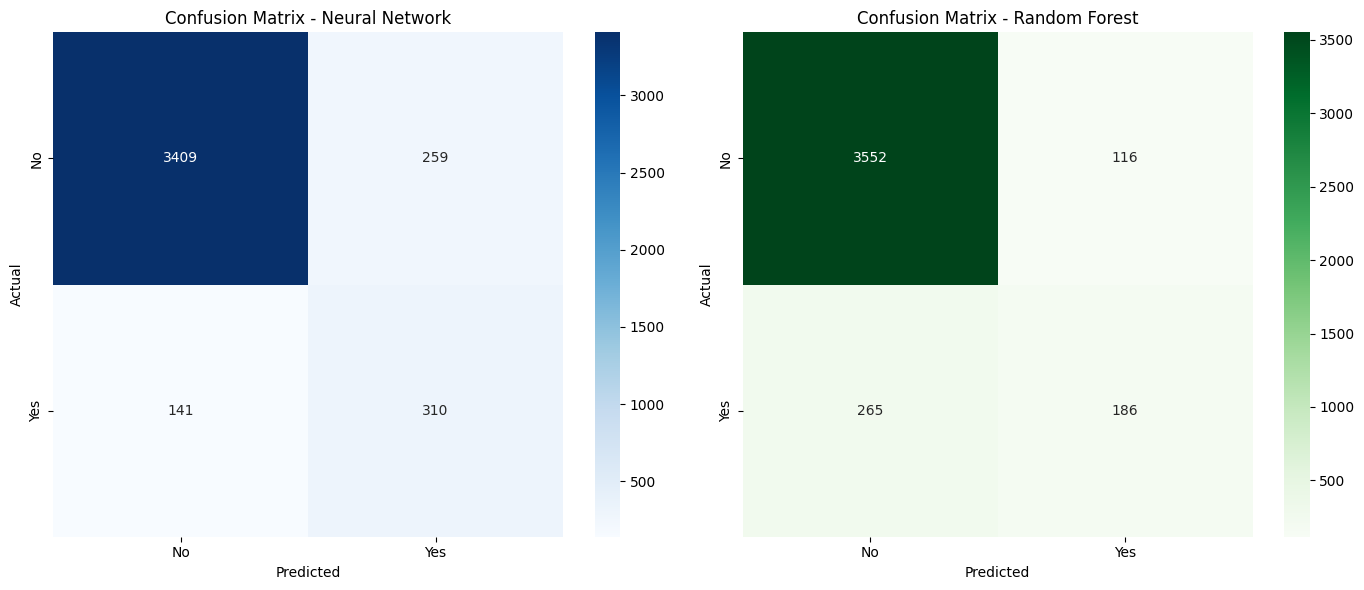

In [28]:
# Convert probabilities to binary predictions
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)
y_pred_rf_binary = (y_pred_rf_probs > 0.5).astype(int)

# Compute Confusion Matrices
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn_binary)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf_binary)

# Plot Confusion Matrices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()


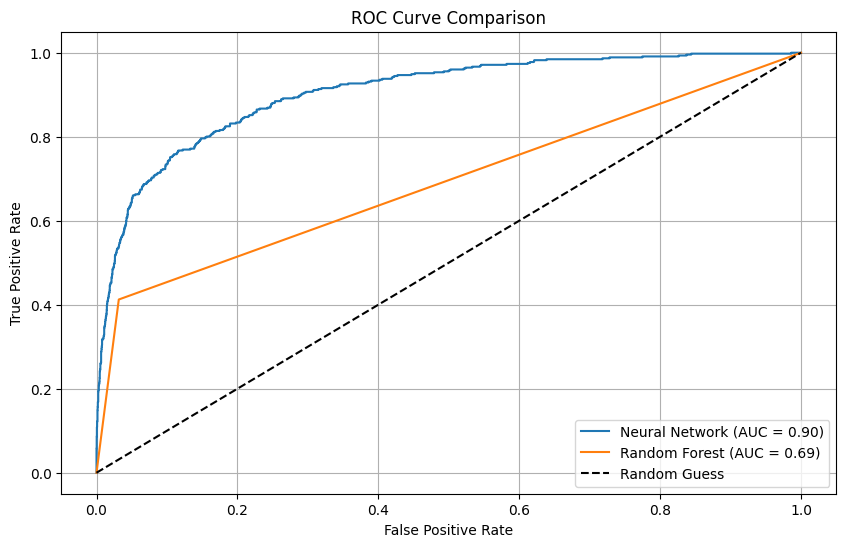

In [29]:
# ROC Curves
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {roc_auc_nn:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()